## 비정형 데이터
- 차원축소
  + 사과 사진 : 10,000개 픽셀 (=10,000개 특성)
  + 너비, 길이, 무게 ==> 특성(Feature)
  + 차원축소를 하게 되면 실행 후, 데이터의 원본(원데이터의 특성) 사라짐
  + 실행 결과 : (1) 핵심 정보만 남게 됨(압축해서) / (2) 데이터의 크기가 작어진다.
- 대표적인 기법 : 주성분 분석(Principal Component Analysis)
 + 공분산 행렬
 + 분산 (Variance)
 + 고유벡터(Eigenvector)

In [120]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-10-24 03:05:14--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-10-24 03:05:14--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-10-24 03:05:15--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... con

## 데이터셋 정의
- 300 : 데이터 샘플의 갯수
- 두번째 100 : 이미지의 높이
- 세번째 100 : 이미지의 너비

In [121]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits.shape

(300, 100, 100)

- 이미지는 0 ~ 255까지의 정숫값으로 표현
  + 0에 가까울수록 색깔이 검정색
  + 255에 가까울수록 색깔이 흰색

In [122]:
print(fruits[0, 0, :])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


## 이미지 시각화

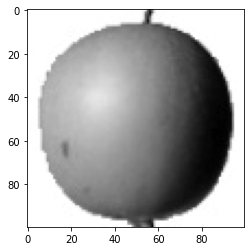

In [123]:
import matplotlib.pyplot as plt
# plt.imshow(fruits[0], cmap='gray')
plt.imshow(fruits[0], cmap='gray_r') 
# 색 반전
plt.show()

- 바나나, 파인애플도 이미지 출력

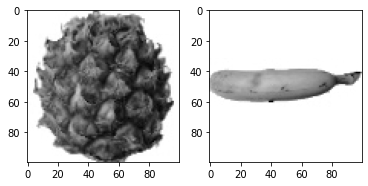

In [124]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(fruits[100], cmap='gray_r')
ax[1].imshow(fruits[200], cmap='gray_r')
plt.show()

## 픽셀 값 분석
- 3차원 데이터를 -> 2차원 또는 1차원으로 변경

In [125]:
#1차원으로 변경
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

print(apple.shape, pineapple.shape, banana.shape)

(100, 10000) (100, 10000) (100, 10000)


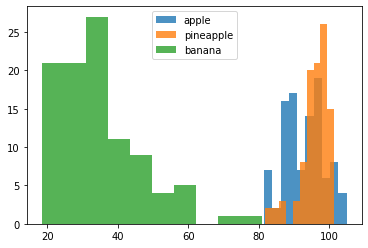

In [126]:
# 각 과일 픽셀의 평균값을 그래프로 표현
plt.hist(np.mean(apple, axis=1), alpha=0.8)
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)
plt.legend(['apple','pineapple','banana'])
plt.show()


- 각 픽셀의 평균

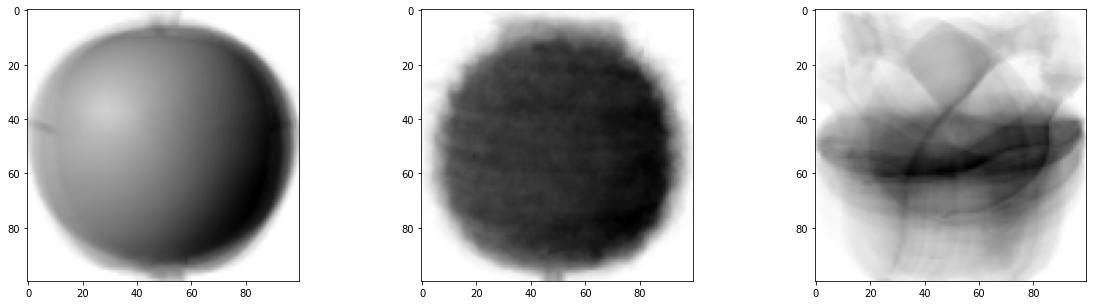

In [127]:
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].imshow(apple_mean, cmap='gray_r')
ax[1].imshow(pineapple_mean, cmap='gray_r')
ax[2].imshow(banana_mean, cmap='gray_r')

- 평균값과 가까운 사진 고르기

In [128]:
abs_diff=np.abs(fruits-apple_mean) # 분산

# 각 샘플의 오차의 평균
abs_mean=np.mean(abs_diff, axis=(1, 2))
print(abs_mean.shape)

(300,)


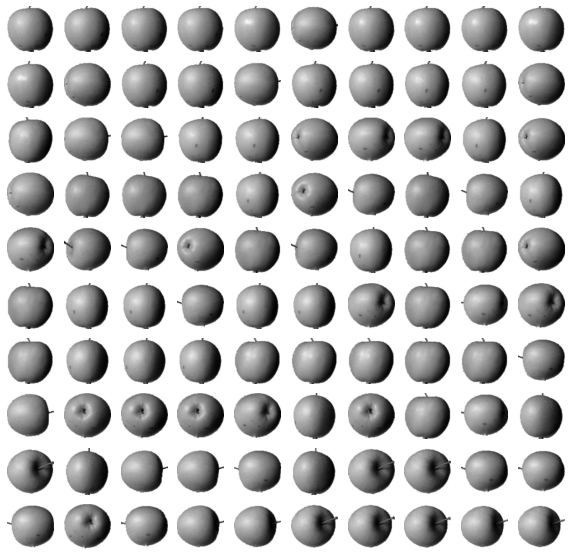

In [129]:
# 100개의 사과 사진을 10X10의 그래프로 표현하기
apple_index =  np.argsort(abs_mean)[:100]

fig, ax = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        ax[i, j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r')
        ax[i, j].axis('off')
plt.show()

In [130]:
fruits_2d = fruits.reshape(-1, 100*100) 
fruits_2d.shape

(300, 10000)

## PCA 변환

In [131]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [132]:
print(pca.components_.shape)

(50, 10000)


In [133]:
pca.components_.reshape(-1, 100, 100).shape

(50, 100, 100)

In [134]:
# 300장의 데이터 100X100을
# PCA 후 결과는
# 50장 데이터 100x100으로 바뀜

In [135]:
#주성분을 그림으로 그리기

import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

- 주성분
  + 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것.

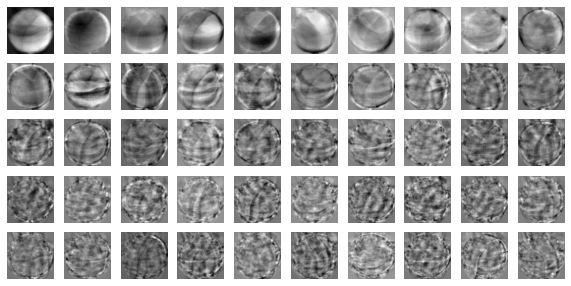

In [136]:
#주성분을 그림으로 그리기
draw_fruits(pca.components_.reshape(-1,100,100))

- 10000개의 특성을 50개 주성분으로 표현해도, 데이터의 원래 "의미"는 보존한다.
  + 사과모양의 "구"모양은 보여주고 있다.
  

In [147]:
print(fruits_2d.shape) # 축소 안한 과일 데이터셋


fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape) # 데이터를 10000개에서 50개로 축소한 과일 데이터셋

(300, 10000)
(300, 50)


--> 딥러닝 프로세스로 진행

## PCA의 최종목적
- 데이터의 특성이 10000개에서 50개로 줄어듬(1/200)
- 데이터 용량이 1/200로 감소함.
- 딥러닝/머신러닝 ==> 매우 시간적으로 절약가능


## 원본 데이터 재구성
- 

In [139]:
fruits_inverse =  pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


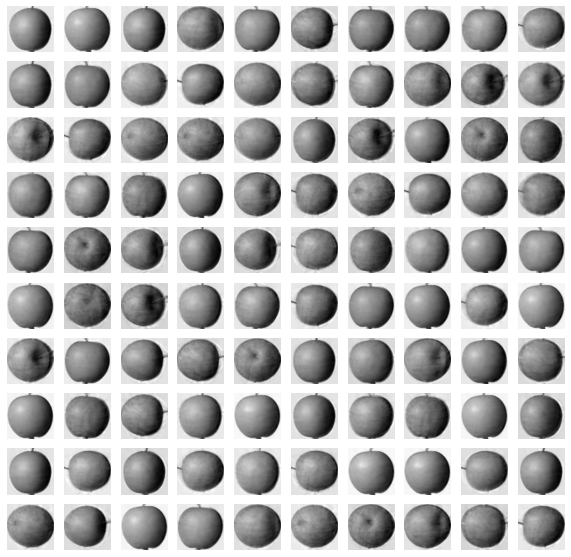

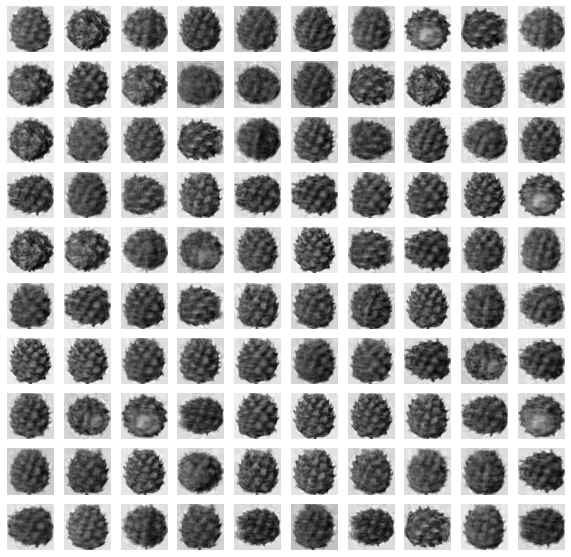

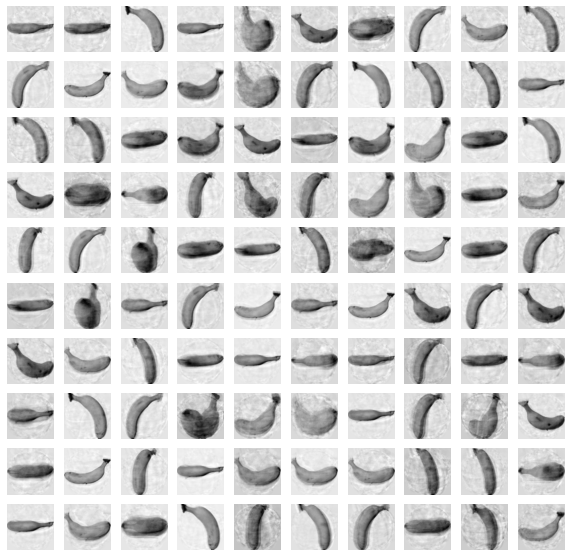

In [140]:
fruits_reconstruct=fruits_inverse.reshape(-1,100,100)
for i in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[i:i+100])
  print("\n")

## 설명된 분산(Explained Variance)
- 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값

In [141]:
print(np.sum(pca.explained_variance_ratio_))
#92%가 넘는 분산을 유지하고 있다.

0.921574389761606


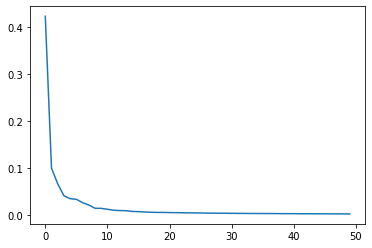

In [142]:
#이 설명된 분산을 그래프로 표현하기 
plt.plot(pca.explained_variance_ratio_)
plt.show()

## 다른 알고리즘과 함께 사용하기(로지스틱회귀)

In [143]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
target = np.array([0] * 100 + [1] * 100 + [2] * 100)


In [144]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)  #축소 안한거
print(np.mean(scores['test_score'])) # 99.6%    
print(np.mean(scores['fit_time'])) # 1초

0.9966666666666667
1.0801533222198487


In [145]:
scores = cross_validate(lr, fruits_pca, target) #축소 한거
print(np.mean(scores['test_score']))  
print(np.mean(scores['fit_time']))

1.0
0.03606691360473633
